In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [11]:
df = pd.read_excel(r"C:\Users\shashiram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = "CustomerDemographic")

In [12]:
df.columns = df.iloc[0]
df = df.drop(0)
df.shape

(4000, 13)

In [13]:
def check_NA():
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret
NaNlist = check_NA()
NaNlist

[0, 0, 125, 0, 0, 87, 506, 656, 0, 0, 302, 0, 87]

In [14]:
df.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11


In [15]:
from datetime import date
today = date.today()
def age(d):
    try:
        return today.year - int(d[:3])
    except:
        try:
            return today.year - d.year
        except:
            return d
l = []
for i in df["DOB"]:
    l.append(age(i))
len(l)
df.insert(5,"Age",l,True)


In [16]:
df.sort_values("Age",ascending=False)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,Age,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
34,34,Jephthah,Bachmann,U,59,1836.0,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20
720,720,Darrel,Canet,Male,67,89.0,1931-10-23 00:00:00,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6
1092,1092,Katlin,Creddon,Female,56,85.0,1935-08-22 00:00:00,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5
3410,3410,Merrili,Brittin,Female,93,80.0,1940-09-22 00:00:00,NaN,Property,Mass Customer,N,á,No,16
2413,2413,Abbey,Murrow,Male,27,77.0,1943-08-11 00:00:00,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17
658,658,Donn,Bonnell,Male,38,76.0,1944-01-24 00:00:00,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8
2495,2495,Gwenore,Suero,Female,89,67.0,1953-11-12 00:00:00,Assistant Professor,IT,Affluent Customer,N,<img src=x onerror=alert('hi') />,No,17
1915,1915,Dusty,Tesimon,Female,40,67.0,1953-10-12 00:00:00,Social Worker,Health,Mass Customer,N,ðµ ð ð ð,Yes,12
2019,2019,Neda,Perkis,Female,48,67.0,1953-09-13 00:00:00,VP Marketing,Entertainment,High Net Worth,N,â©testâ©,No,17
2482,2482,Regan,Siemens,Male,95,67.0,1953-12-10 00:00:00,Pharmacist,Health,Mass Customer,N,ç¤¾æç§å­¸é¢èªå­¸ç ç©¶æ,Yes,10


In [17]:
ind = df[df["Age"] >= 100].index
df.drop(ind,inplace=True)
len(df)

3999

In [18]:
df['gender'].unique()

array(['F', 'Male', 'Female', 'Femal', 'M', 'U'], dtype=object)

In [19]:
dft = pd.read_excel(r"C:\Users\shashiram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = "Transactions")

In [20]:
dft.columns = dft.iloc[0]
dft = dft.drop(0)
dft.shape

(20000, 13)

In [21]:
dft.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [22]:
dft["order_status"].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [23]:
dft.sort_values('customer_id',ascending = False).head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
17469,17469,0,5034,2017-01-03 00:00:00,False,Approved,OHM Cycles,Road,medium,medium,742.54,667.4,33879
16701,16701,0,5034,2017-01-27 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.3,35667
8708,8708,0,5034,2017-10-07 00:00:00,False,Approved,Solex,Road,medium,medium,416.98,312.735,42218
8562,8562,33,3500,2017-08-08 00:00:00,False,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888
6309,6309,69,3500,2017-01-09 00:00:00,True,Approved,Giant Bicycles,Road,medium,medium,792.9,594.68,33879


In [24]:
d = dft[dft['customer_id'] > 4000].index
dft.drop(d, inplace=True)

In [25]:
trans = dft[dft["order_status"]=='Approved'].groupby("customer_id").agg({"transaction_id" : 'count',
                                                                "list_price" : "sum",
                                                                "standard_cost" : 'sum'
                                                                })
trans.columns

Index(['transaction_id', 'list_price', 'standard_cost'], dtype='object')

In [26]:
trans['profit'] = trans['list_price'] - trans['standard_cost']

In [27]:
result = pd.concat([df,trans],axis=1)

In [28]:
dfa = pd.read_excel(r"C:\Users\shashiram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = "CustomerAddress")

In [29]:
dfa.columns = dfa.iloc[0]
dfa = dfa.drop(0)
dfa.head(2)

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [30]:
dfa.index = dfa['customer_id']
dfa = dfa.drop(['customer_id'],axis=1)
dfa.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [31]:
d = dfa[dfa.index > 4000].index
dfa.drop(d, inplace=True)

In [32]:
result = pd.concat([result,dfa],axis=1)

In [33]:
result.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'transaction_id', 'list_price',
       'standard_cost', 'profit', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

<BarContainer object of 6 artists>

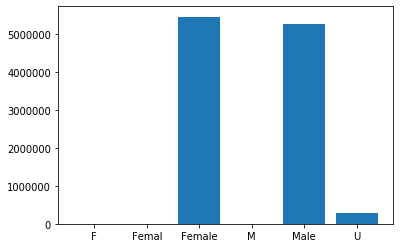

In [34]:
wealth_check = result.groupby("gender").agg({"profit" : 'sum'})
r = range(6)
plt.bar(r,wealth_check['profit'],tick_label = wealth_check.index)

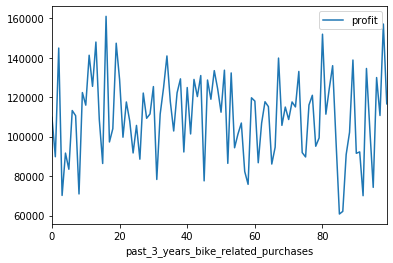

In [35]:
r = result.groupby('past_3_years_bike_related_purchases').agg({'profit':'sum'})
r.plot.line()

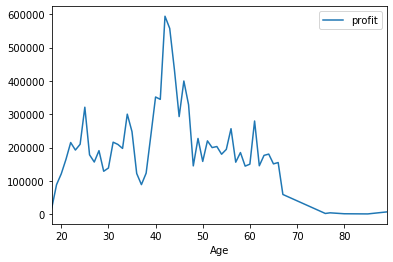

In [36]:
r = result.groupby('Age').agg({'profit':'sum'})
r.plot.line()

<BarContainer object of 9 artists>

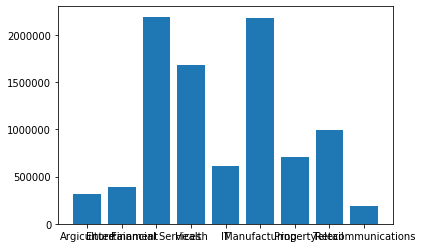

In [37]:
job_industry_category_check = result.groupby("job_industry_category").agg({"profit" : 'sum'})
r = range(9)
plt.bar(r,job_industry_category_check['profit'],tick_label = job_industry_category_check.index)

In [38]:
job_industry_category_check

,profit
job_industry_category,
Argiculture,310212.71
Entertainment,385846.77
Financial Services,2191985.42
Health,1683918.29
IT,610274.02
Manufacturing,2180336.03
Property,705942.02
Retail,989379.89
Telecommunications,189728.59


<BarContainer object of 3 artists>

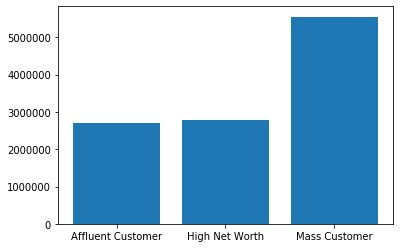

In [39]:
job_wealth_segment = result.groupby("wealth_segment").agg({"profit" : 'sum'})
r = range(3)
plt.bar(r,job_wealth_segment['profit'],tick_label = job_wealth_segment.index)

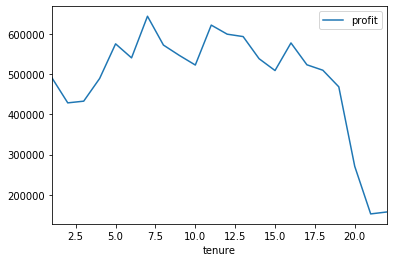

In [40]:
r = result.groupby('tenure').agg({'profit':'sum'})
r.plot.line()

In [41]:
r

,profit
tenure,
1,491397.00
2,428659.13
3,432904.94
4,489422.92
5,575481.26
6,540599.51
7,644166.72
8,572460.66
9,546687.70


<BarContainer object of 5 artists>

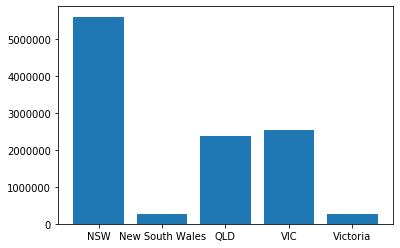

In [42]:
state_check = result.groupby("state").agg({"profit" : 'sum'})
r = range(5)
plt.bar(r,state_check['profit'],tick_label = state_check.index)

In [43]:
dfn = pd.read_excel(r"C:\Users\shashiram\Downloads\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = "NewCustomerList")

In [44]:
dfn.columns = dfn.iloc[0]
dfn = dfn.drop(0)
dfn.shape

(1000, 23)

In [45]:
dfn.columns

Index([                         'first_name',
                                 'last_name',
                                    'gender',
       'past_3_years_bike_related_purchases',
                                       'DOB',
                                 'job_title',
                     'job_industry_category',
                            'wealth_segment',
                        'deceased_indicator',
                                  'owns_car',
                                    'tenure',
                                   'address',
                                  'postcode',
                                     'state',
                                   'country',
                        'property_valuation',
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                  

In [46]:

today = date.today()
def age(d):
    try:
        return today.year - int(d[:3])
    except:
        try:
            return today.year - d.year
        except:
            return d
l = []
for i in dfn["DOB"]:
    l.append(age(i))
len(l)
dfn.insert(5,"Age",l,True)


In [47]:
dfn.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,nan,nan,nan,nan,nan,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,1825.0,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,0.56,0.70,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,1823.0,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,0.89,0.89,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,46.0,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,1.01,1.01,1.0100,1.010000,1.0,1,1.71875


In [48]:
dfn.sort_values("Age",ascending=False)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,nan,nan,nan,nan,nan,Rank,Value
741,Glory,Chilcott,Female,49,1939-09-09,1827.0,NaN,Telecommunications,High Net Worth,N,...,QLD,Australia,5,0.82,0.8200,0.820000,0.820000,741.0,741,0.65875
770,Andrea,Pendle,Female,86,1938-08-05,1827.0,NaN,NaN,High Net Worth,N,...,QLD,Australia,6,0.58,0.7250,0.906250,0.906250,760.0,760,0.6375
886,Zachariah,Meininking,Male,40,1938-06-09,1827.0,Cost Accountant,Financial Services,Affluent Customer,N,...,NSW,Australia,7,0.56,0.7000,0.700000,0.700000,883.0,883,0.53125
858,Piper,Issacov,Female,67,1939-11-08,1827.0,Human Resources Assistant III,Health,Affluent Customer,N,...,NSW,Australia,9,0.99,1.2375,1.546875,1.546875,856.0,856,0.56
344,Bessy,Saladin,Female,22,1939-12-22,1827.0,VP Marketing,Manufacturing,Mass Customer,N,...,QLD,Australia,10,0.51,0.6375,0.796875,0.677344,341.0,341,0.99
840,Ginger,NaN,Male,94,1939-02-19,1827.0,Human Resources Manager,NaN,Mass Customer,N,...,NSW,Australia,8,0.65,0.6500,0.812500,0.690625,840.0,840,0.571094
586,Letizia,Poore,Female,27,1938-08-30,1827.0,Web Developer II,Manufacturing,Affluent Customer,N,...,VIC,Australia,3,0.81,0.8100,0.810000,0.810000,583.0,583,0.7875
798,Anthony,Morison,Male,7,1938-06-08,1827.0,General Manager,Health,Mass Customer,N,...,NSW,Australia,9,1.03,1.0300,1.287500,1.094375,797.0,797,0.6
600,Esther,McOnie,Female,59,1939-05-26,1827.0,Legal Assistant,NaN,Mass Customer,N,...,NSW,Australia,12,1.05,1.0500,1.312500,1.115625,599.0,599,0.775
177,Devonne,Alderwick,Female,79,1939-01-29,1827.0,Research Associate,NaN,High Net Worth,N,...,VIC,Australia,7,0.56,0.7000,0.700000,0.700000,177.0,177,1.1625


In [49]:
i = dfn[dfn['Age']>=100].index
dfn.drop(i,inplace=True)
dfn.shape

(71, 24)